In [3]:
import geojson
import geopandas as gpd

import pandas as pd
print(geojson.__version__)  # 输出安装的 geojson 版本

# 读取 GeoJSON 文件
with open(r"export.geojson", "r") as f:
    geo_data = geojson.load(f)
    #导入犯罪数据
crimedata = pd.read_csv("dataset\MPS LSOA Level Crime (most recent 24 months) (3).csv")


# 加载 GeoJSON 文件
geo_data = gpd.read_file("export.geojson")



3.1.0


In [4]:
# 获取所有月份的列名
month_columns = [col for col in crimedata.columns if col.isdigit()]

# 计算每个区域的总犯罪数（所有月份的和）
total_crimes_by_area = crimedata[month_columns].sum(axis=1)
total_crimes_with_location = pd.DataFrame({
    'LSOA Code': crimedata['LSOA Code'],
    'LSOA Name': crimedata['LSOA Name'],
    'Borough':crimedata['Borough'],
    'Total Crimes': total_crimes_by_area
})

# 显示犯罪数最多的10个区域
print("犯罪数最多的10个区域：")
print(total_crimes_with_location.sort_values('Total Crimes', ascending=False).head(10))

犯罪数最多的10个区域：
       LSOA Code         LSOA Name    Borough  Total Crimes
99056  E01035716  Westminster 013G  E09000033         12309
99054  E01035716  Westminster 013G  E09000033          9685
89041  E01004763  Westminster 013B  E09000033          9402
88528  E01004734  Westminster 018A  E09000033          7874
89039  E01004763  Westminster 013B  E09000033          6771
88526  E01004734  Westminster 018A  E09000033          6694
88576  E01004736  Westminster 018C  E09000033          3878
88574  E01004736  Westminster 018C  E09000033          2811
99055  E01035716  Westminster 013G  E09000033          2772
45346  E01002444   Hillingdon 031A  E09000017          2646


In [5]:
# 按Major Category和区域分组计算总和
crimes_by_category = crimedata.groupby(['LSOA Code', 'LSOA Name', 'Major Category'])[month_columns].sum().sum(axis=1).reset_index()
crimes_by_category.columns = ['LSOA Code', 'LSOA Name', 'Crime Type', 'Total']

# 找出每个区域最常见的犯罪类型
most_common_crime = crimes_by_category.sort_values('Total', ascending=False).groupby('LSOA Code').first()
print("\n各区域最常见的犯罪类型（前10个区域）：")
print(most_common_crime.head(10))


各区域最常见的犯罪类型（前10个区域）：
                           LSOA Name                   Crime Type  Total
LSOA Code                                                               
E01000006  Barking and Dagenham 016A  VIOLENCE AGAINST THE PERSON     74
E01000007  Barking and Dagenham 015A  VIOLENCE AGAINST THE PERSON    347
E01000008  Barking and Dagenham 015B  VIOLENCE AGAINST THE PERSON    121
E01000009  Barking and Dagenham 016B  VIOLENCE AGAINST THE PERSON    200
E01000011  Barking and Dagenham 016C  VIOLENCE AGAINST THE PERSON    112
E01000012  Barking and Dagenham 015D  VIOLENCE AGAINST THE PERSON    166
E01000013  Barking and Dagenham 013A  VIOLENCE AGAINST THE PERSON    145
E01000014  Barking and Dagenham 013B  VIOLENCE AGAINST THE PERSON     92
E01000015  Barking and Dagenham 009A  VIOLENCE AGAINST THE PERSON    116
E01000016  Barking and Dagenham 009B  VIOLENCE AGAINST THE PERSON     65


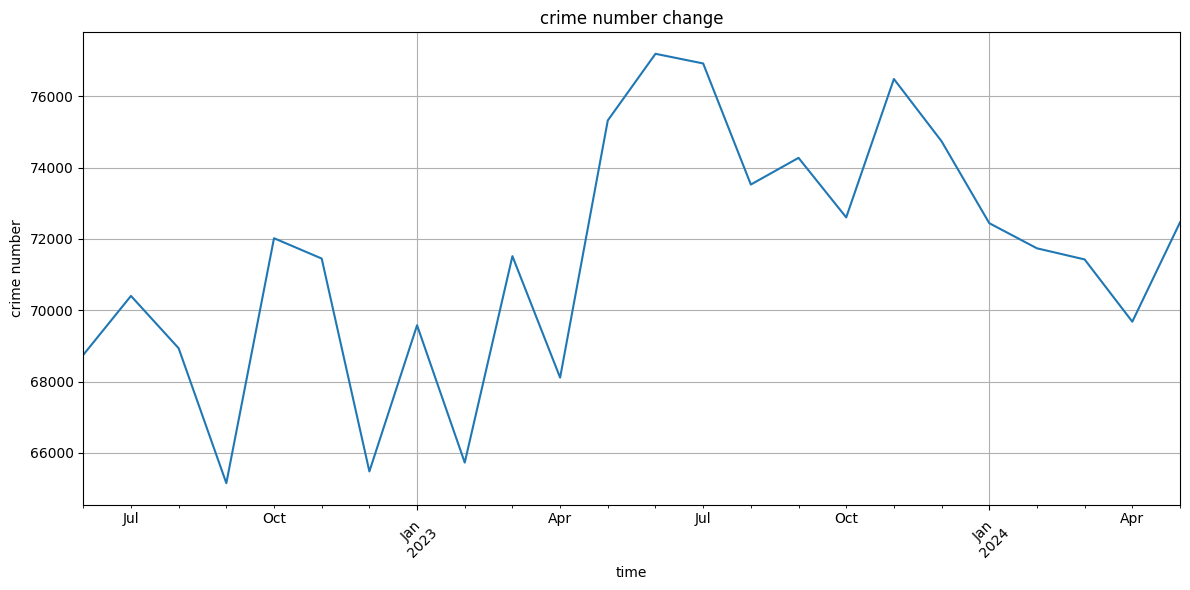

In [6]:
# 计算每个月份的总犯罪数
monthly_totals = crimedata[month_columns].sum()

# 将索引转换为日期格式
monthly_totals.index = pd.to_datetime(monthly_totals.index, format='%Y%m')

# 绘制时间序列图
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_totals.plot()
plt.title('crime number change')
plt.xlabel('time')
plt.ylabel('crime number')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1500x5000 with 0 Axes>

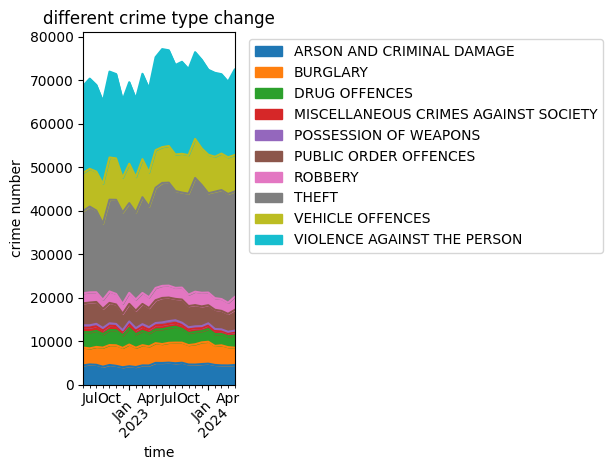

In [7]:
# 按犯罪类型统计每月犯罪数
crime_types_over_time = crimedata.groupby('Major Category')[month_columns].sum()

# 转置数据以便绘图
crime_types_over_time = crime_types_over_time.T
crime_types_over_time.index = pd.to_datetime(crime_types_over_time.index, format='%Y%m')

# 绘制堆叠面积图
plt.figure(figsize=(15, 50))
crime_types_over_time.plot(kind='area', stacked=True)
plt.title('different crime type change')
plt.xlabel('time')
plt.ylabel('crime number')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# 只保留关键列
columns_to_keep = ["id", "geometry"]
geodata_cleaned = geo_data[columns_to_keep]


In [9]:
# 确保 geometry 列是 shapely 对象
geo_gdf = gpd.GeoDataFrame(geodata_cleaned, geometry="geometry")

# 检查坐标系 (CRS)，如果需要，可以设置 CRS
geo_gdf.set_crs(epsg=4326, inplace=True)  


,id,geometry
0,node/780856,POINT (-0.22631 51.50607)
1,node/1256794,POINT (-0.47183 51.50974)
2,node/2013971,POINT (-0.19232 51.60084)
3,node/9780241,POINT (0.10572 51.39474)
4,node/13884199,POINT (-0.24880 51.61267)
...,...,...
595,node/10657930632,POINT (-0.24321 51.53209)
596,node/10657930633,POINT (-0.24437 51.53239)
597,node/12207364957,POINT (-0.10455 51.51975)
598,node/12251132731,POINT (-0.40669 51.42572)


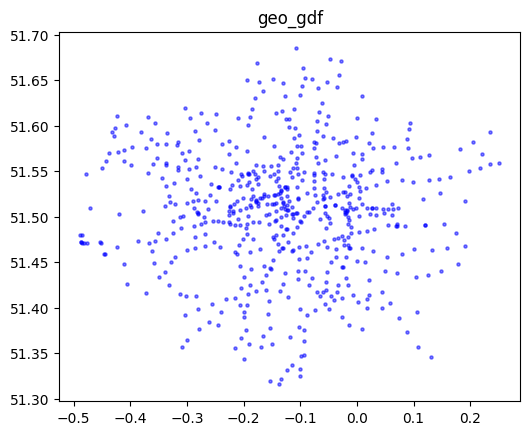

In [10]:
import matplotlib.pyplot as plt

# 绘制站点位置
geo_gdf.plot(markersize=5, color="blue", alpha=0.5)
plt.title("geo_gdf")
plt.show()


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import geopandas as gpd

# 1. 读取数据
# 读取伦敦行政区边界数据
borough_data = gpd.read_file("statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
# 转换坐标系统
boroughlon = borough_data.to_crs(epsg=4326)

# 读取站点数据并进行空间连接
stations_with_borough = gpd.sjoin(geo_gdf, boroughlon, how="left", predicate="within")

# 2. 准备犯罪数据
# 获取所有月份的列名（除了非月份的列）
crime_months = [col for col in crimedata.columns if col not in ['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category']]

# 按borough汇总所有月份的犯罪率总和
boroughcrimerate = crimedata.groupby('Borough')[crime_months].sum().sum(axis=1).reset_index()
boroughcrimerate.columns = ['Borough', 'crime_rate']

# 3. 统计每个行政区的站点数量
boroughstationcount = stations_with_borough.groupby("NAME").size().reset_index(name="station_count")

# 4. 合并数据
borough_analysis = boroughcrimerate.merge(boroughstationcount, left_on="Borough", right_on="NAME", how="inner")


相关性分析：
Pearson相关系数: 0.731
P值: 0.0000

回归分析结果：
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7928.6335   8416.861      0.942      0.354   -9260.891    2.51e+04
station_count  2436.9862    415.426      5.866      0.000    1588.573    3285.399


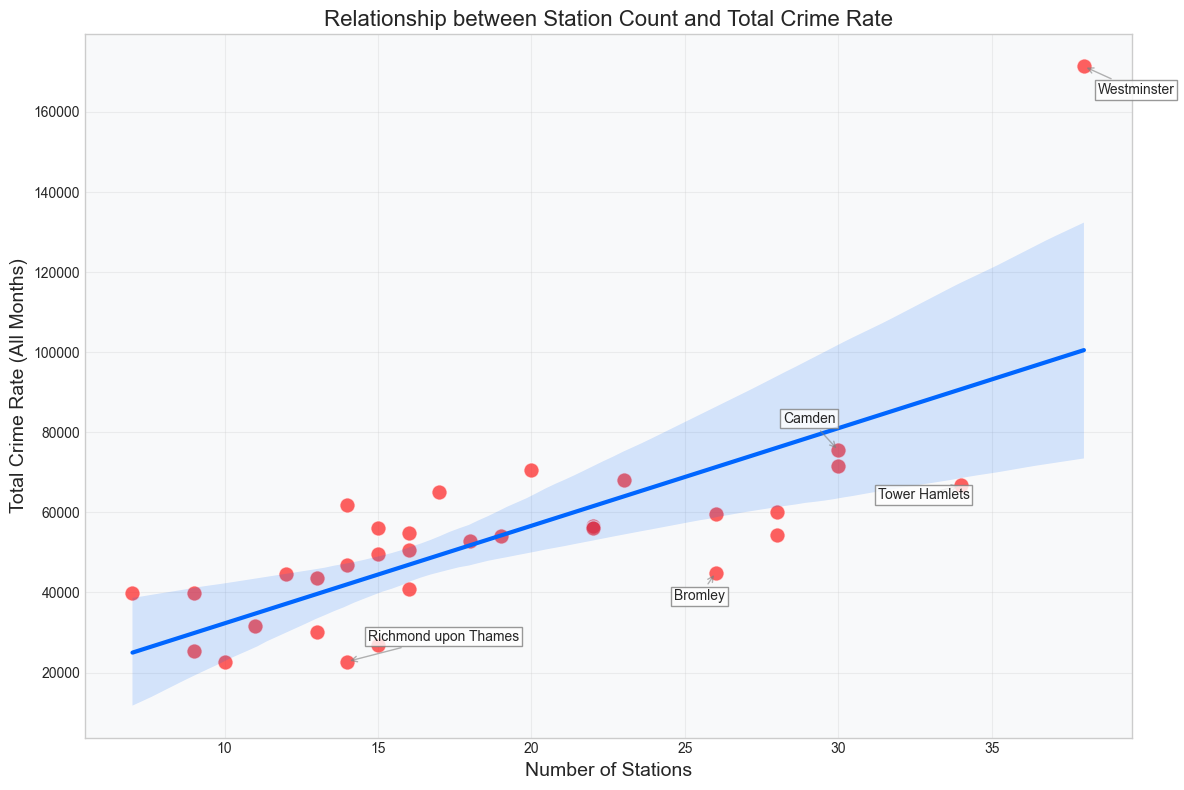

In [12]:
# 1. 从boroughlon数据创建GSS代码到名称的映射
gss_name_mapping = pd.Series(boroughlon['NAME'].values, index=boroughlon['GSS_CODE']).to_dict()

# 2. 在犯罪数据中添加行政区名称
boroughcrimerate['NAME'] = boroughcrimerate['Borough'].map(gss_name_mapping)

# 3. 重新进行数据分析
# 合并数据
borough_analysis = boroughcrimerate.merge(boroughstationcount, on="NAME", how="inner")
# 5. 相关性分析
correlation, p_value = stats.pearsonr(borough_analysis["station_count"], borough_analysis["crime_rate"])
print(f"\n相关性分析：")
print(f"Pearson相关系数: {correlation:.3f}")
print(f"P值: {p_value:.4f}")

# 6. 回归分析
X = sm.add_constant(borough_analysis['station_count'])
y = borough_analysis['crime_rate']
model = sm.OLS(y, X).fit()
print("\n回归分析结果：")
print(model.summary().tables[1])

# 7. 可视化分析
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# 设置背景色
ax = plt.gca()
ax.set_facecolor('#F8F9FA')

# 散点图
sns.scatterplot(
    data=borough_analysis,
    x="station_count",
    y="crime_rate",
    s=120,
    color='#FF1E1E',
    alpha=0.7
)

# 回归线
sns.regplot(
    data=borough_analysis,
    x="station_count",
    y="crime_rate",
    scatter=False,
    color='#0066FF',
    line_kws={'linewidth': 3}
)

# 标注重要区域
important_boroughs = [
    'Westminster',  # 最高犯罪率
    'Camden',      # 高站点数和高犯罪率
    'Tower Hamlets', # 高站点数
    'Richmond upon Thames',  # 低犯罪率
    'Bromley'      # 典型案例
]

label_positions = {
    'Westminster': (10, -20),
    'Camden': (-40, 20),
    'Tower Hamlets': (-60, -10),
    'Richmond upon Thames': (15, 15),
    'Bromley': (-30, -20)
}

for idx, row in borough_analysis.iterrows():
    if row['NAME'] in important_boroughs:
        plt.annotate(
            row['NAME'],
            (row['station_count'], row['crime_rate']),
            xytext=label_positions[row['NAME']],
            textcoords='offset points',
            fontsize=10,
            bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, pad=2),
            arrowprops=dict(arrowstyle='->', color='gray', alpha=0.6)
        )

plt.title('Relationship between Station Count and Total Crime Rate', fontsize=16)
plt.xlabel('Number of Stations', fontsize=14)
plt.ylabel('Total Crime Rate (All Months)', fontsize=14)
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

车站分布特征：
伦敦各行政区平均有18.75个车站
车站数量分布较为均匀（标准差为7.8）
最少的区域有7个车站，最多的区域（Westminster）有38个车站
50%的行政区拥有13.75到23.75个车站
犯罪数量特征：
平均每个行政区有53,622起犯罪
犯罪数量差异较大（标准差为26,006）
最低的区域有22,549起犯罪，最高的区域（Westminster）有171,390起
犯罪数据呈现右偏分布，说明少数区域的犯罪率显著高于平均水平
相关性分析：
车站数量与犯罪率呈现强正相关（r = 0.731）
P值远小于0.05，表明这种相关性具有统计显著性
这意味着车站数量越多的区域，通常犯罪率也越高
回归分析：
回归模型显示，平均每增加一个车站，犯罪数量增加约2,437起
基准犯罪数量（截距）约为7,929起
模型具有统计显著性（P值 < 0.001）
特殊区域分析：
Westminster区最为突出：
拥有最多的车站（38个）
同时也有最高的犯罪率（171,390起）
中心区域（如Camden、Newham）普遍具有较多的车站和较高的犯罪率
Tower Hamlets有第二多的车站（34个），但犯罪率相对较低


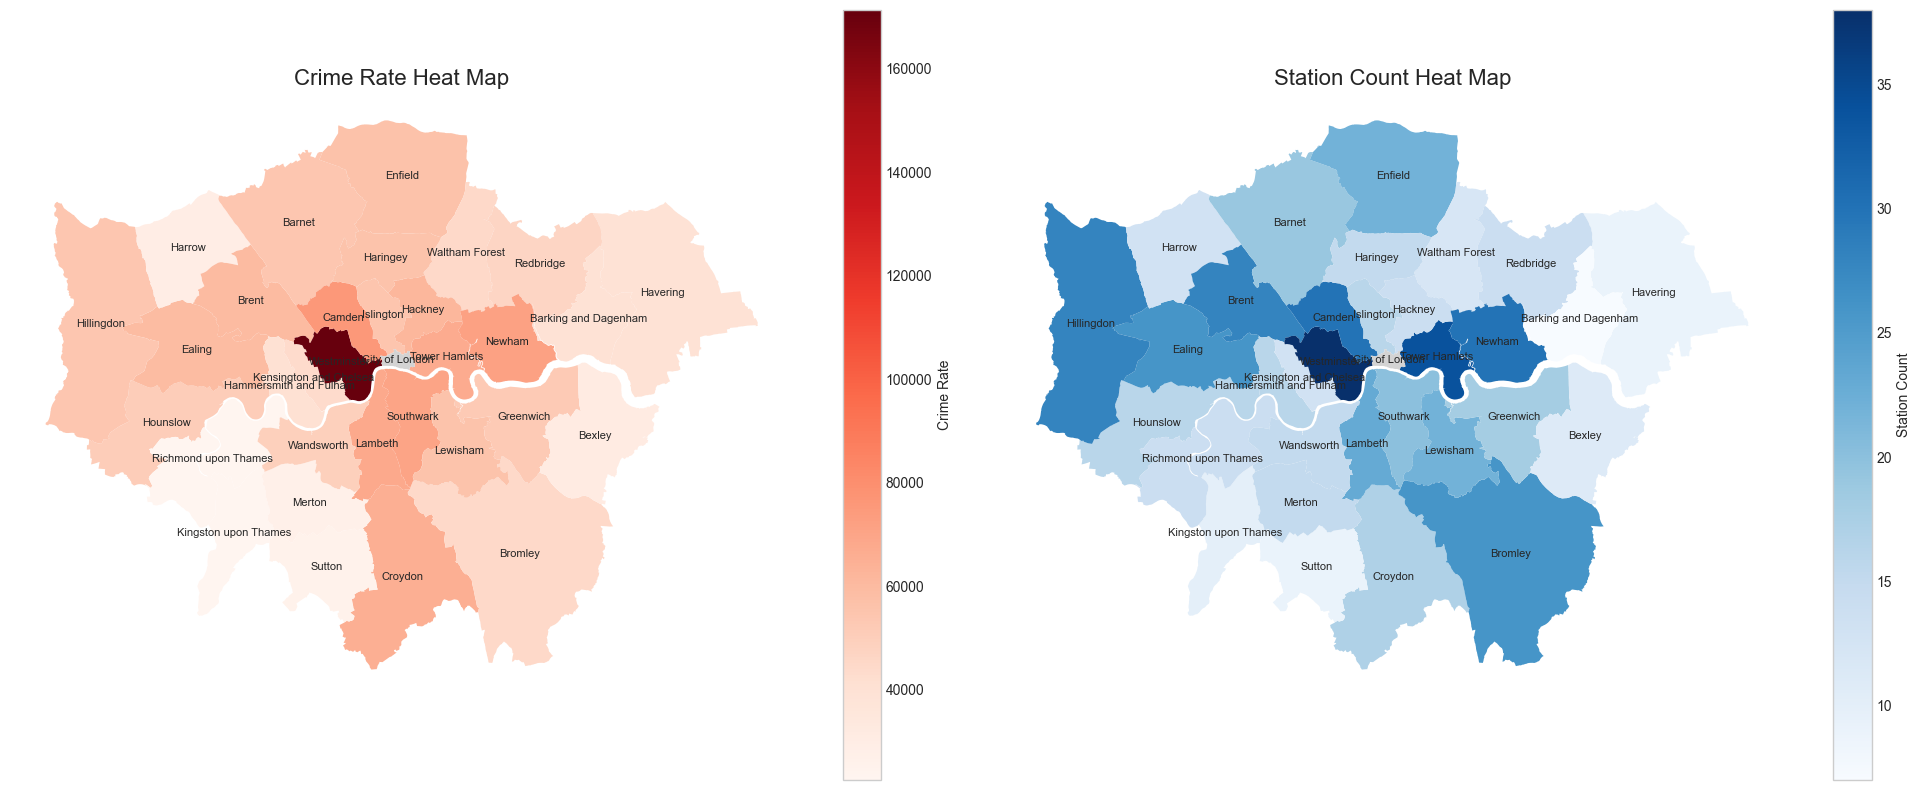

In [13]:
import folium
from branca.colormap import LinearColormap

# 创建两个地图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 第一个热力图 - 犯罪率（红色）
boroughlon['crime_rate'] = boroughlon['GSS_CODE'].map(
    borough_analysis.set_index('Borough')['crime_rate']
)

boroughlon.plot(
    column='crime_rate',
    ax=ax1,
    legend=True,
    legend_kwds={'label': 'Crime Rate'},
    cmap='Reds',
    missing_kwds={'color': 'lightgrey'}
)
ax1.set_title('Crime Rate Heat Map', fontsize=16)
ax1.axis('off')

# 第二个热力图 - 车站数量（蓝色）
boroughlon['station_count'] = boroughlon['NAME'].map(
    borough_analysis.set_index('NAME')['station_count']
)

boroughlon.plot(
    column='station_count',
    ax=ax2,
    legend=True,
    legend_kwds={'label': 'Station Count'},
    cmap='Blues',
    missing_kwds={'color': 'lightgrey'}
)
ax2.set_title('Station Count Heat Map', fontsize=16)
ax2.axis('off')

# 添加区域标签
for idx, row in boroughlon.iterrows():
    ax1.annotate(
        text=row['NAME'],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha='center',
        va='center',
        fontsize=8
    )
    ax2.annotate(
        text=row['NAME'],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha='center',
        va='center',
        fontsize=8
    )

plt.tight_layout()
plt.show()


hypothesis3：公共交通的无障碍等级越高，犯罪率就越高。

In [14]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [15]:
file_path2 = 'dataset\Borough AvPTAI.csv'
data2=pd.read_csv(file_path2)

In [16]:
# 创建PTAL等级到数值的映射字典
ptal_mapping = {
    '0': 0,
    '1a': 1,
    '1b': 1.5,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6a': 6,
    '6b': 6.5
}
# 转换PTAL列
data2['PTAL_numeric'] = data2['PTAL'].map(ptal_mapping)
print(data2.columns.to_list())



['Borough Code', 'Borough Name', 'AvPTAI2015', 'PTAL', 'PTAL_numeric']


In [17]:
# 1. 计算每个区域的总犯罪数量
crime_months = [col for col in crimedata.columns if col not in ['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category']]
total_crime = crimedata.groupby('Borough')[crime_months].sum().sum(axis=1).reset_index()
total_crime.columns = ['Borough', 'total_crime']

# 2. 创建PTAL数值映射
ptal_mapping = {
    '0': 0,
    '1a': 1,
    '1b': 1.5,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6a': 6,
    '6b': 6.5
}
data2['PTAL_numeric'] = data2['PTAL'].map(ptal_mapping)

# 3. 合并数据集
merged_data = total_crime.merge(data2, left_on='Borough', right_on='Borough Code', how='inner')

# 4. 检查合并结果
print("合并后的数据集形状：", merged_data.shape)
print("\n前几行数据：")
print(merged_data[['Borough Name', 'total_crime', 'PTAL', 'PTAL_numeric']].head())

print("\n检查是否有未匹配的区域：")
print("\n犯罪数据中的区域：", total_crime['Borough'].nunique())
print("PTAL数据中的区域：", data2['Borough Code'].nunique())
print("合并后的区域：", merged_data['Borough'].nunique())

# 5. 基本统计
print("\n基本统计信息：")
print(merged_data[['total_crime', 'PTAL_numeric']].describe())

# 6. 相关性分析
correlation = merged_data['total_crime'].corr(merged_data['PTAL_numeric'])
print("\n犯罪率和PTAL的相关系数：", correlation)

合并后的数据集形状： (32, 7)

前几行数据：
           Borough Name  total_crime PTAL  PTAL_numeric
0  Barking and Dagenham        39907    2           2.0
1                Barnet        54220    2           2.0
2                Bexley        31552   1b           1.5
3                 Brent        60222    2           2.0
4               Bromley        44947   1b           1.5

检查是否有未匹配的区域：

犯罪数据中的区域： 32
PTAL数据中的区域： 33
合并后的区域： 32

基本统计信息：
         total_crime  PTAL_numeric
count      32.000000     32.000000
mean    53622.125000      2.843750
std     26005.751051      1.422387
min     22549.000000      1.500000
25%     40698.250000      2.000000
50%     53494.500000      2.000000
75%     60609.750000      4.000000
max    171390.000000      6.000000

犯罪率和PTAL的相关系数： 0.5911968949816969


In [18]:
# 1. 先计算每个区的station数量
boroughstationcount = stations_with_borough.groupby("NAME").size().reset_index(name="station_count")

# 2. 合并所有数据集
# 先合并犯罪数据和PTAL数据
merged_data = crimedata.merge(data2, left_on='Borough', right_on='Borough Code', how='left')

# 再合并station数量数据
merged_data = merged_data.merge(boroughstationcount, left_on='Borough Name', right_on='NAME', how='left')

# 检查合并结果
print("合并后的数据集形状：", merged_data.shape)
print("\n前几行数据：")
print(merged_data[['Borough', 'Borough Name', 'Major Category', 'Minor Category', 'PTAL', 'PTAL_numeric', 'station_count']].head())

合并后的数据集形状： (99188, 36)

前几行数据：
     Borough          Borough Name             Major Category  \
0  E09000002  Barking and Dagenham  ARSON AND CRIMINAL DAMAGE   
1  E09000002  Barking and Dagenham                   BURGLARY   
2  E09000002  Barking and Dagenham                   BURGLARY   
3  E09000002  Barking and Dagenham              DRUG OFFENCES   
4  E09000002  Barking and Dagenham              DRUG OFFENCES   

           Minor Category PTAL  PTAL_numeric  station_count  
0         CRIMINAL DAMAGE    2           2.0              7  
1  BURGLARY - RESIDENTIAL    2           2.0              7  
2  BURGLARY IN A DWELLING    2           2.0              7  
3     POSSESSION OF DRUGS    2           2.0              7  
4    TRAFFICKING OF DRUGS    2           2.0              7  


In [19]:
disability_data=pd.read_csv('dataset\disability.csv')
population_data=pd.read_csv('dataset\population.csv')
poverty_data=pd.read_csv('dataset\poverty_level.csv')
job_density_data=pd.read_csv('dataset\job_density.csv')

In [20]:

print(disability_data.columns.to_list())
print(population_data.columns.to_list())
print(poverty_data.columns.to_list())
print(job_density_data.columns.to_list)

['local authority: county / unitary (as of April 2023)', 'mnemonic', 'Disabled under the Equality Act', 'Not disabled under the Equality Act']
['local authority: county / unitary (as of April 2023)', 'mnemonic', '2021']
['Lower tier local authorities Code', 'Lower tier local authorities', 'Household deprivation (6 categories) Code', 'Household deprivation (6 categories)', 'Observation']
<bound method IndexOpsMixin.tolist of Index(['local authority: district / unitary (as of April 2021)', 'mnemonic',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')>


In [21]:
# 1. 查看各数据集的结构
print("Disability数据列名：", disability_data.columns.tolist())
print("\nPopulation数据列名：", population_data.columns.tolist())
print("\nPoverty数据列名：", poverty_data.columns.tolist())
print("\nJob Density数据列名：", job_density_data.columns.tolist())

# 2. 查看每个数据集的前几行
print("\nDisability数据前几行：")
print(disability_data.head())
print("\nPopulation数据前几行：")
print(population_data.head())
print("\nPoverty数据前几行：")
print(poverty_data.head())
print("\nJob Density数据前几行：")
print(job_density_data.head())

Disability数据列名： ['local authority: county / unitary (as of April 2023)', 'mnemonic', 'Disabled under the Equality Act', 'Not disabled under the Equality Act']

Population数据列名： ['local authority: county / unitary (as of April 2023)', 'mnemonic', '2021']

Poverty数据列名： ['Lower tier local authorities Code', 'Lower tier local authorities', 'Household deprivation (6 categories) Code', 'Household deprivation (6 categories)', 'Observation']

Job Density数据列名： ['local authority: district / unitary (as of April 2021)', 'mnemonic', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

Disability数据前几行：
  local authority: county / unitary (as of April 2023)   mnemonic  \
0                                         Hartlepool    E06000001   
1                                      Middlesbrough    E06000002   
2                               Redcar and Cleveland    E06000003   
3                                   Stockton-on-Tees    E06000004   
4              

In [23]:
# 1. 处理Disability数据
disability_processed = disability_data.copy()
disability_processed['disability_rate'] = (disability_processed['Disabled under the Equality Act'] / 
    (disability_processed['Disabled under the Equality Act'] + disability_processed['Not disabled under the Equality Act'])) * 100
disability_processed = disability_processed[['mnemonic', 'disability_rate']]

# 2. 处理Population数据
population_processed = population_data[['mnemonic', '2021']]
population_processed.columns = ['mnemonic', 'population']

# 3. 处理Poverty数据
poverty_summary = poverty_data.pivot_table(
    index='Lower tier local authorities Code',
    columns='Household deprivation (6 categories) Code',
    values='Observation',
    aggfunc='sum'
).fillna(0)

total_households = poverty_summary.sum(axis=1)
deprived_households = poverty_summary[[3, 4]].sum(axis=1)
poverty_processed = pd.DataFrame({
    'mnemonic': poverty_summary.index,
    'poverty_rate': (deprived_households / total_households * 100)
})

# 4. 处理Job Density数据
job_density_processed = job_density_data[['mnemonic', '2021']]
job_density_processed.columns = ['mnemonic', 'job_density']

# 5. 分步合并数据，每次合并后删除多余的mnemonic列
# 首先合并disability数据
merged_data = merged_data.merge(
    disability_processed,
    left_on='Borough',
    right_on='mnemonic',
    how='left'
)
merged_data = merged_data.drop('mnemonic', axis=1)

# 合并population数据
merged_data = merged_data.merge(
    population_processed,
    left_on='Borough',
    right_on='mnemonic',
    how='left'
)
merged_data = merged_data.drop('mnemonic', axis=1)

# 合并poverty数据
merged_data = merged_data.merge(
    poverty_processed,
    left_on='Borough',
    right_on='mnemonic',
    how='left'
)
merged_data = merged_data.drop('mnemonic', axis=1)

# 合并job density数据
merged_data = merged_data.merge(
    job_density_processed,
    left_on='Borough',
    right_on='mnemonic',
    how='left'
)
merged_data = merged_data.drop('mnemonic', axis=1)

# 6. 检查合并结果
print("合并后的数据集形状：", merged_data.shape)
print("\n前几行关键数据：")
print(merged_data[['Borough', 'Borough Name', 'PTAL', 'station_count', 
                  'disability_rate', 'population', 'poverty_rate', 'job_density']].head())

# 7. 检查缺失值
print("\n各新增列的缺失值数量：")
print(merged_data[['disability_rate', 'population', 'poverty_rate', 'job_density']].isnull().sum())

# 8. 基本统计描述
print("\n新增变量的基本统计：")
print(merged_data[['disability_rate', 'population', 'poverty_rate', 'job_density']].describe())

合并后的数据集形状： (99188, 40)

前几行关键数据：
     Borough          Borough Name PTAL  station_count  disability_rate  \
0  E09000002  Barking and Dagenham    2              7        12.992549   
1  E09000002  Barking and Dagenham    2              7        12.992549   
2  E09000002  Barking and Dagenham    2              7        12.992549   
3  E09000002  Barking and Dagenham    2              7        12.992549   
4  E09000002  Barking and Dagenham    2              7        12.992549   

   population  poverty_rate  job_density  
0      218869     24.949257          0.5  
1      218869     24.949257          0.5  
2      218869     24.949257          0.5  
3      218869     24.949257          0.5  
4      218869     24.949257          0.5  

各新增列的缺失值数量：
disability_rate    0
population         0
poverty_rate       0
job_density        0
dtype: int64

新增变量的基本统计：
       disability_rate     population  poverty_rate   job_density
count     99188.000000   99188.000000  99188.000000  99188.000000
mean

In [24]:
print(merged_data.columns.to_list())

['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category', '202206', '202207', '202208', '202209', '202210', '202211', '202212', '202301', '202302', '202303', '202304', '202305', '202306', '202307', '202308', '202309', '202310', '202311', '202312', '202401', '202402', '202403', '202404', '202405', 'Borough Code', 'Borough Name', 'AvPTAI2015', 'PTAL', 'PTAL_numeric', 'NAME', 'station_count', 'disability_rate', 'population', 'poverty_rate', 'job_density']


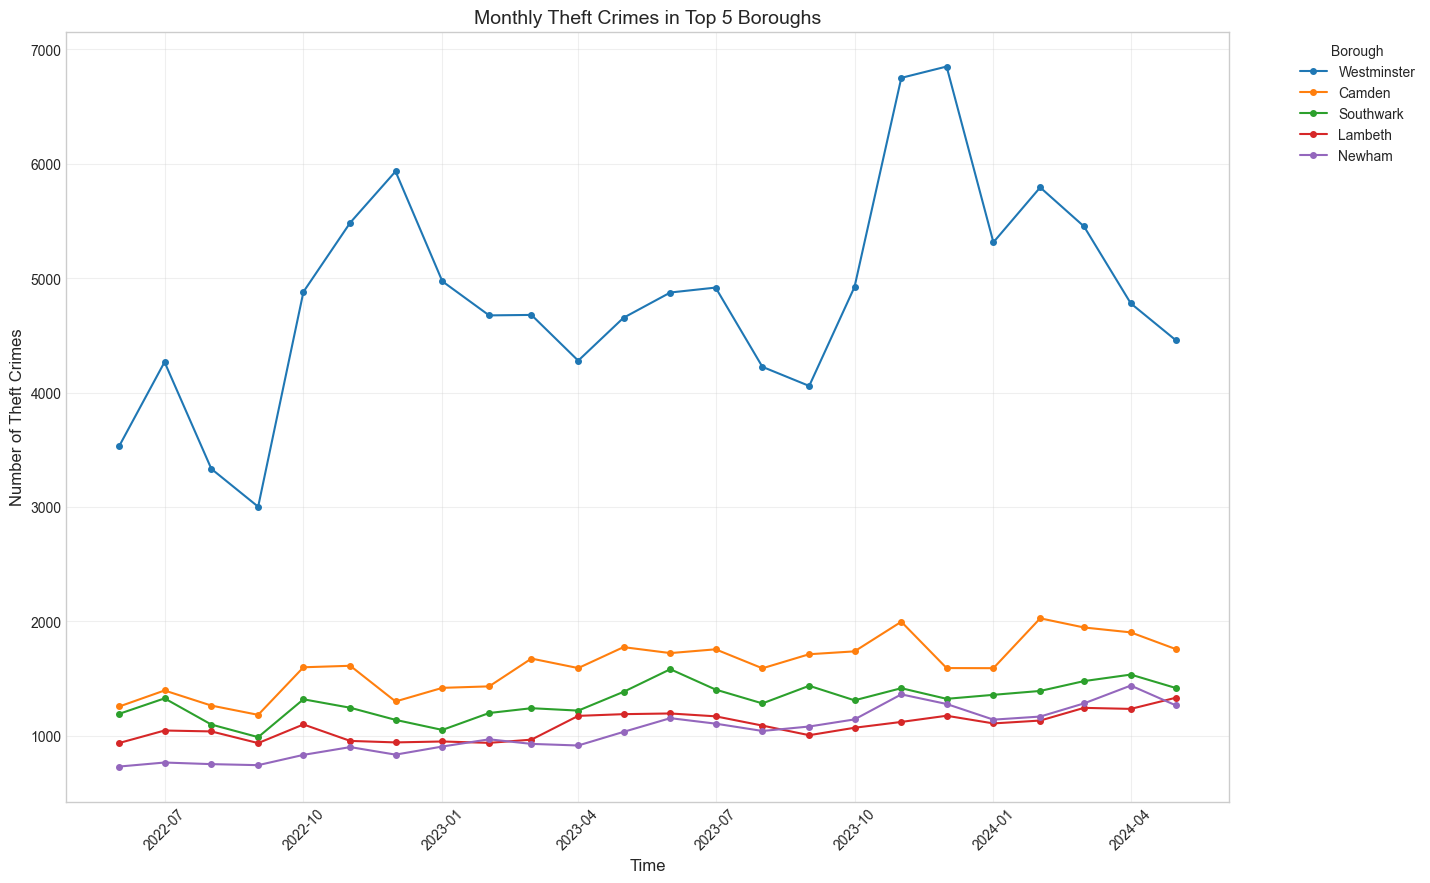

In [40]:
# 1. 计算每个区域每个月的盗窃犯罪数量
theft_categories = ['THEFT', 'ROBBERY']
theft_data = crimedata[crimedata['Major Category'].isin(theft_categories)]

# 获取时间列
time_columns = [col for col in crimedata.columns if col not in ['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category']]

# 计算每个区域每个月的盗窃犯罪总数
monthly_theft = theft_data.groupby('Borough')[time_columns].sum()

# 2. 计算每个区域的总盗窃犯罪数量并排序
total_theft = monthly_theft.sum(axis=1).sort_values(ascending=False)


# 3. 添加区域名称
borough_names = merged_data[['Borough', 'Borough Name']].drop_duplicates().set_index('Borough')
monthly_theft = monthly_theft.join(borough_names)

# 4. 可视化时间趋势
plt.figure(figsize=(15, 10))

# 选择前5个高发区域进行可视化
top5_boroughs = total_theft.head(5).index

# 转换日期格式
dates = [pd.to_datetime(str(x), format='%Y%m') for x in time_columns]

# 绘制时间序列图
for borough in top5_boroughs:
    borough_name = borough_names.loc[borough, 'Borough Name']
    plt.plot(dates, monthly_theft.loc[borough, time_columns], 
             label=borough_name, marker='o', markersize=4)

plt.title('Monthly Theft Crimes in Top 5 Boroughs', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Theft Crimes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)


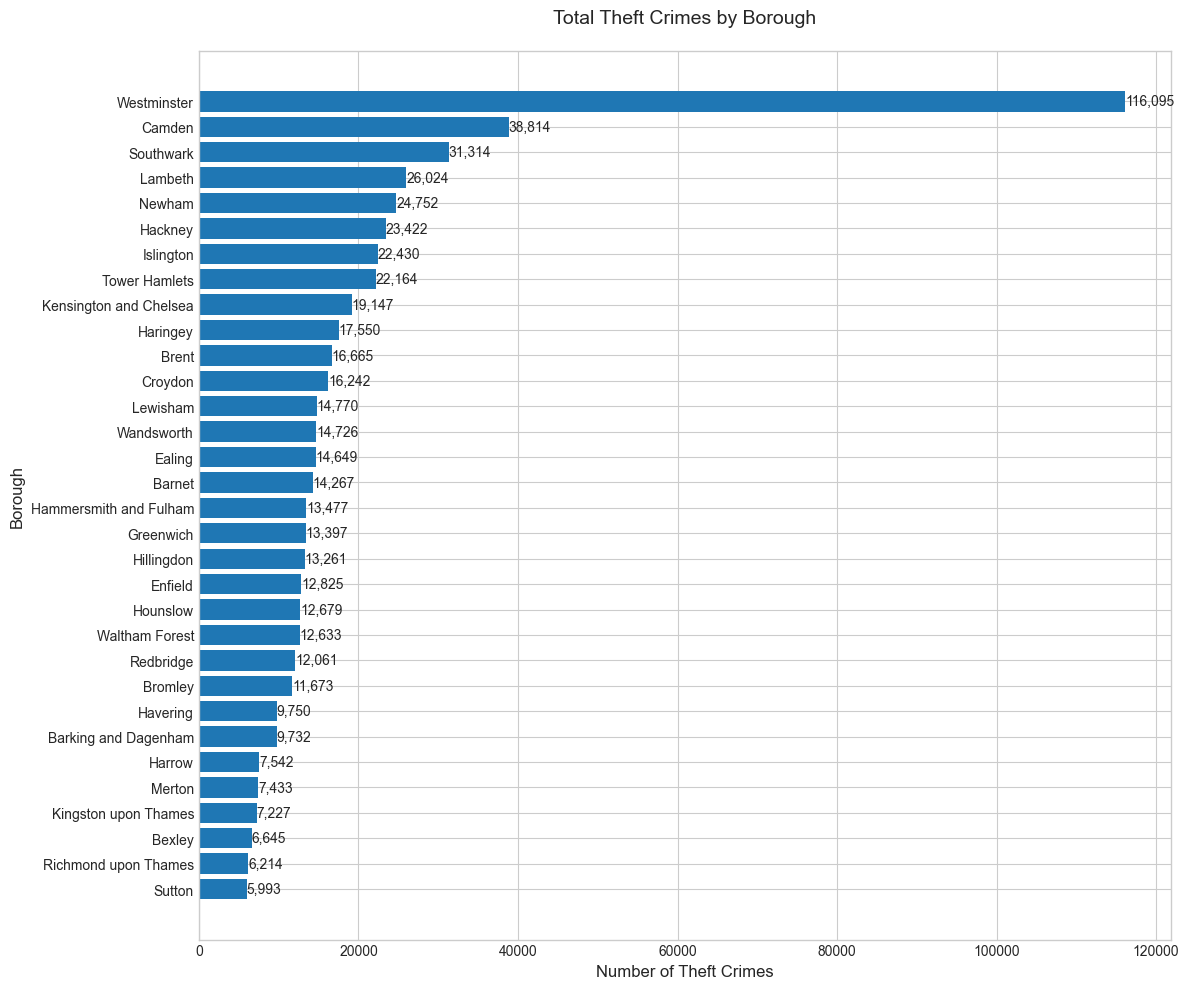


盗窃犯罪统计数据：
                     Borough Name  total_theft
Borough                                       
E09000033             Westminster       116095
E09000007                  Camden        38814
E09000028               Southwark        31314
E09000022                 Lambeth        26024
E09000025                  Newham        24752
E09000012                 Hackney        23422
E09000019               Islington        22430
E09000030           Tower Hamlets        22164
E09000020  Kensington and Chelsea        19147
E09000014                Haringey        17550
E09000005                   Brent        16665
E09000008                 Croydon        16242
E09000023                Lewisham        14770
E09000032              Wandsworth        14726
E09000009                  Ealing        14649
E09000003                  Barnet        14267
E09000013  Hammersmith and Fulham        13477
E09000011               Greenwich        13397
E09000017              Hillingdon        13261
E0

In [37]:
# 1. 计算每个区域的总盗窃犯罪数量
theft_categories = ['THEFT', 'ROBBERY']
theft_data = crimedata[crimedata['Major Category'].isin(theft_categories)]

# 获取时间列
time_columns = [col for col in crimedata.columns if col not in ['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category']]

# 计算每个区域的总盗窃犯罪数量
monthly_theft = theft_data.groupby('Borough')[time_columns].sum()
total_theft = monthly_theft.sum(axis=1)

# 添加区域名称
borough_names = merged_data[['Borough', 'Borough Name']].drop_duplicates().set_index('Borough')
total_theft = total_theft.to_frame('total_theft').join(borough_names)

# 按犯罪数量降序排序
total_theft = total_theft.sort_values('total_theft', ascending=True)  # 升序排列便于从下往上画柱状图

# 2. 创建柱状图
plt.figure(figsize=(12, 10))
bars = plt.barh(total_theft['Borough Name'], total_theft['total_theft'])
plt.title('Total Theft Crimes by Borough', fontsize=14, pad=20)
plt.xlabel('Number of Theft Crimes', fontsize=12)
plt.ylabel('Borough', fontsize=12)

# 在柱子上添加数值标签
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}',  # 格式化数字，添加千位分隔符
             ha='left', va='center', fontsize=10)
    
plt.tight_layout()
plt.show()

# 3. 输出统计数据
print("\n盗窃犯罪统计数据：")
print(total_theft.sort_values('total_theft', ascending=False)[['Borough Name', 'total_theft']].to_string())

# 4. 基本统计描述
print("\n基本统计描述：")
print(total_theft['total_theft'].describe().round(2))

# 5. 输出Top 5和Bottom 5
print("\n犯罪数量最多的5个区域：")
print(total_theft.nlargest(5, 'total_theft')[['Borough Name', 'total_theft']].to_string())

print("\n犯罪数量最少的5个区域：")
print(total_theft.nsmallest(5, 'total_theft')[['Borough Name', 'total_theft']].to_string())

# 6. 计算一些额外的统计信息
total_crimes = total_theft['total_theft'].sum()
print(f"\n总盗窃犯罪数量: {total_crimes:,}")
print(f"平均每个区域盗窃犯罪数量: {total_theft['total_theft'].mean():,.2f}")
print(f"标准差: {total_theft['total_theft'].std():,.2f}")
print(f"变异系数: {(total_theft['total_theft'].std() / total_theft['total_theft'].mean() * 100):.2f}%")

各PTAL等级的犯罪统计：
             total_crime              
                    mean     std count
PTAL_numeric                          
1.5              3033.17  597.04     6
2.0              3107.77  797.37    13
3.0              3542.00  335.31     4
4.0              3006.33  624.37     3
5.0              3030.25  771.67     4
6.0              2640.00   41.01     2

ANOVA分析结果：
F统计量: 0.623
P值: 0.5433

非线性回归分析结果：
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2311.9860    798.324      2.896      0.007     679.231    3944.741
PTAL           605.1276    537.463      1.126      0.269    -494.109    1704.364
PTAL_squared   -92.8839     75.335     -1.233      0.227    -246.961      61.193


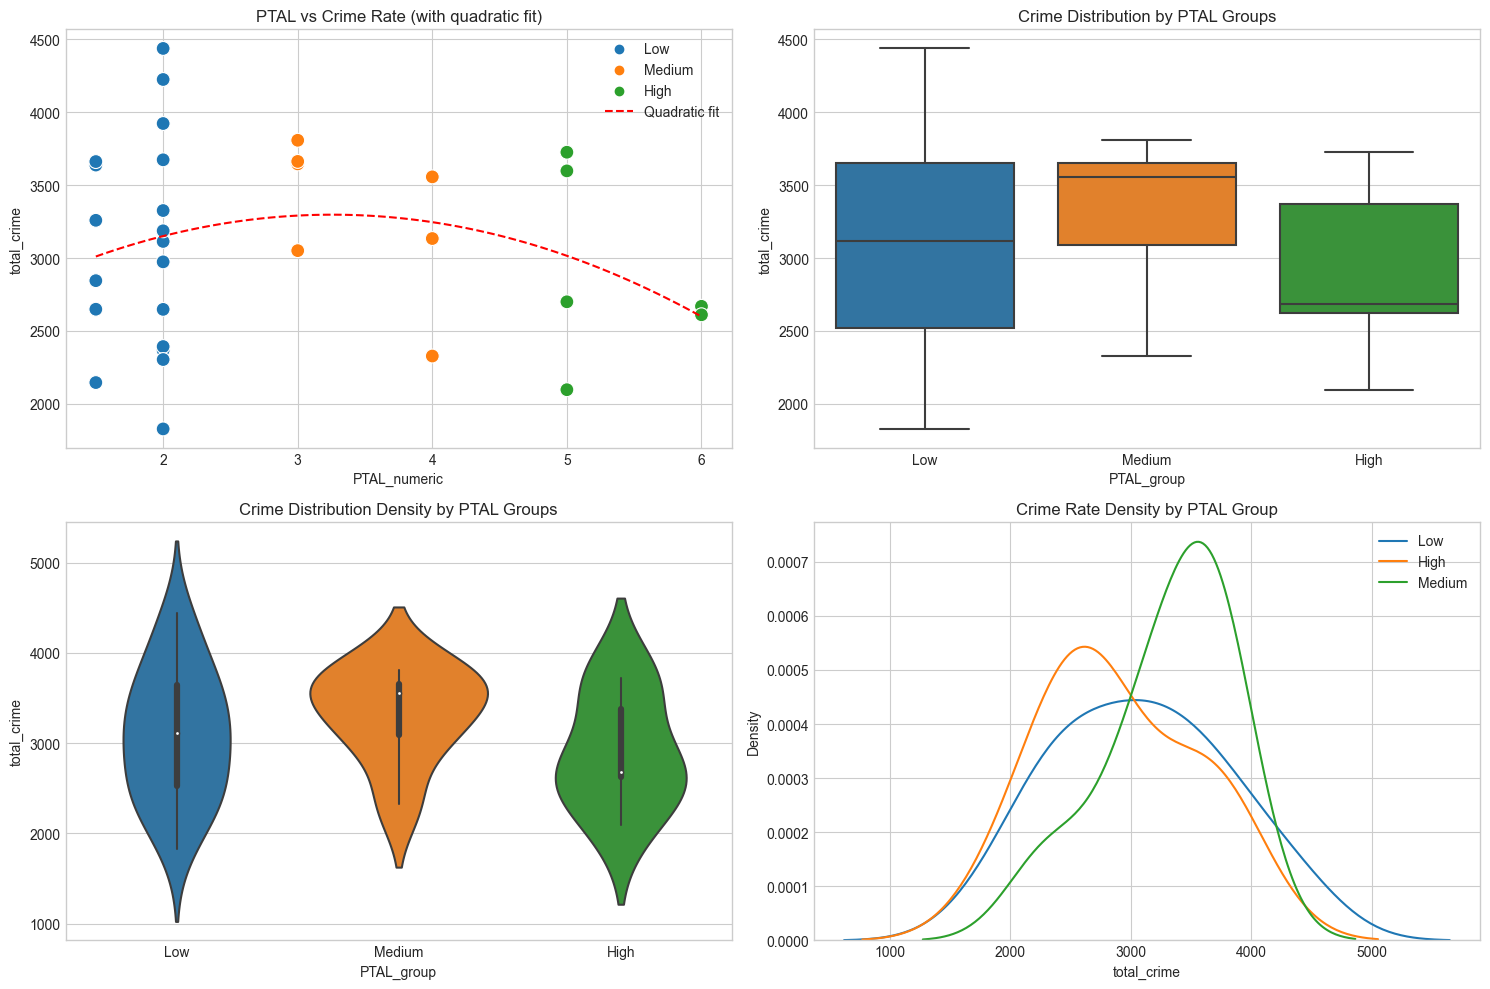


异常值分析（|Z-score| > 2）：
  Borough Name  PTAL_numeric  total_crime
6      Croydon           2.0         4438

高犯罪率区域的PTAL分布：
PTAL_group
Low       0.625
Medium    0.250
High      0.125
Name: proportion, dtype: float64


In [26]:
# 1. PTAL分组分析
ptal_groups = crime_summary.groupby('PTAL_numeric').agg({
    'total_crime': ['mean', 'std', 'count']
}).round(2)
print("各PTAL等级的犯罪统计：")
print(ptal_groups)

# 2. 方差分析（ANOVA）
# 将PTAL分为低(1.5-2)、中(3-4)、高(5-6)三组
crime_summary['PTAL_group'] = pd.cut(
    crime_summary['PTAL_numeric'], 
    bins=[0, 2, 4, 6], 
    labels=['Low', 'Medium', 'High']
)
ptal_groups = [group['total_crime'] for name, group in crime_summary.groupby('PTAL_group')]
f_stat, p_val = stats.f_oneway(*ptal_groups)
print("\nANOVA分析结果：")
print(f"F统计量: {f_stat:.3f}")
print(f"P值: {p_val:.4f}")

# 3. 非线性关系检验
# 添加二次项
X = crime_summary['PTAL_numeric']
X_squared = sm.add_constant(pd.DataFrame({
    'PTAL': X,
    'PTAL_squared': X**2
}))
y = crime_summary['total_crime']
model_nonlinear = sm.OLS(y, X_squared).fit()
print("\n非线性回归分析结果：")
print(model_nonlinear.summary().tables[1])

# 4. 可视化：包含非线性趋势
plt.figure(figsize=(15, 10))

# 主图：散点图和趋势线
plt.subplot(2, 2, 1)
sns.scatterplot(data=crime_summary, x='PTAL_numeric', y='total_crime', hue='PTAL_group', s=100)
X_plot = np.linspace(X.min(), X.max(), 100)
X_plot_squared = sm.add_constant(pd.DataFrame({
    'PTAL': X_plot,
    'PTAL_squared': X_plot**2
}))
y_plot = model_nonlinear.predict(X_plot_squared)
plt.plot(X_plot, y_plot, 'r--', label='Quadratic fit')
plt.title('PTAL vs Crime Rate (with quadratic fit)')
plt.legend()

# 箱型图：PTAL分组
plt.subplot(2, 2, 2)
sns.boxplot(data=crime_summary, x='PTAL_group', y='total_crime')
plt.title('Crime Distribution by PTAL Groups')

# 小提琴图：显示分布
plt.subplot(2, 2, 3)
sns.violinplot(data=crime_summary, x='PTAL_group', y='total_crime')
plt.title('Crime Distribution Density by PTAL Groups')

# 密度图
plt.subplot(2, 2, 4)
for group in crime_summary['PTAL_group'].unique():
    subset = crime_summary[crime_summary['PTAL_group'] == group]
    sns.kdeplot(data=subset['total_crime'], label=group)
plt.title('Crime Rate Density by PTAL Group')
plt.legend()

plt.tight_layout()
plt.show()

# 5. 异常值分析
z_scores = stats.zscore(crime_summary['total_crime'])
outliers = crime_summary[abs(z_scores) > 2]
print("\n异常值分析（|Z-score| > 2）：")
print(outliers[['Borough Name', 'PTAL_numeric', 'total_crime']])

# 6. 条件概率分析
# 高犯罪率（高于75%分位数）区域中的PTAL分布
high_crime_threshold = crime_summary['total_crime'].quantile(0.75)
high_crime_areas = crime_summary[crime_summary['total_crime'] > high_crime_threshold]
print("\n高犯罪率区域的PTAL分布：")
print(high_crime_areas['PTAL_group'].value_counts(normalize=True))

In [28]:
# 1. 检查原始数据中的犯罪类别
print("所有犯罪类别：")
print(merged_data['Major Category'].unique())

# 2. 修改盗窃类别（根据实际数据调整）
theft_categories = ['THEFT', 'ROBBERY']  # 根据实际数据中的类别名称调整
theft_data = merged_data[merged_data['Major Category'].isin(theft_categories)]

print("\n盗窃相关犯罪数量：", len(theft_data))
print("\n盗窃犯罪类别分布：")
print(theft_data['Major Category'].value_counts())

# 3. 如果数据正确，继续分析
theft_summary = theft_data.groupby(['Borough', 'Borough Name', 'PTAL_numeric'])['Major Category'].count().reset_index()
theft_summary.columns = ['Borough', 'Borough Name', 'PTAL_numeric', 'theft_count']

print("\n汇总数据形状：", theft_summary.shape)
print("\n汇总数据前几行：")
print(theft_summary.head())

所有犯罪类别：
['ARSON AND CRIMINAL DAMAGE' 'BURGLARY' 'DRUG OFFENCES'
 'MISCELLANEOUS CRIMES AGAINST SOCIETY' 'PUBLIC ORDER OFFENCES' 'ROBBERY'
 'THEFT' 'VEHICLE OFFENCES' 'VIOLENCE AGAINST THE PERSON'
 'POSSESSION OF WEAPONS']

盗窃相关犯罪数量： 22885

盗窃犯罪类别分布：
Major Category
THEFT      16232
ROBBERY     6653
Name: count, dtype: int64

汇总数据形状： (32, 4)

汇总数据前几行：
     Borough          Borough Name  PTAL_numeric  theft_count
0  E09000002  Barking and Dagenham           2.0          538
1  E09000003                Barnet           2.0          935
2  E09000004                Bexley           1.5          531
3  E09000005                 Brent           2.0          862
4  E09000006               Bromley           1.5          763


盗窃犯罪基本统计：
       PTAL_numeric    theft_count
count     32.000000      32.000000
mean       2.843750   18611.656250
std        1.422387   19309.879498
min        1.500000    5993.000000
25%        2.000000   11192.250000
50%        2.000000   13872.000000
75%        4.000000   19901.250000
max        6.000000  116095.000000

相关性分析：
Pearson相关系数: 0.654
P值: 0.0000

回归分析结果：
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6653.5294   5940.243     -1.120      0.272   -1.88e+04    5478.064
PTAL_numeric  8884.4609   1874.082      4.741      0.000    5057.074    1.27e+04


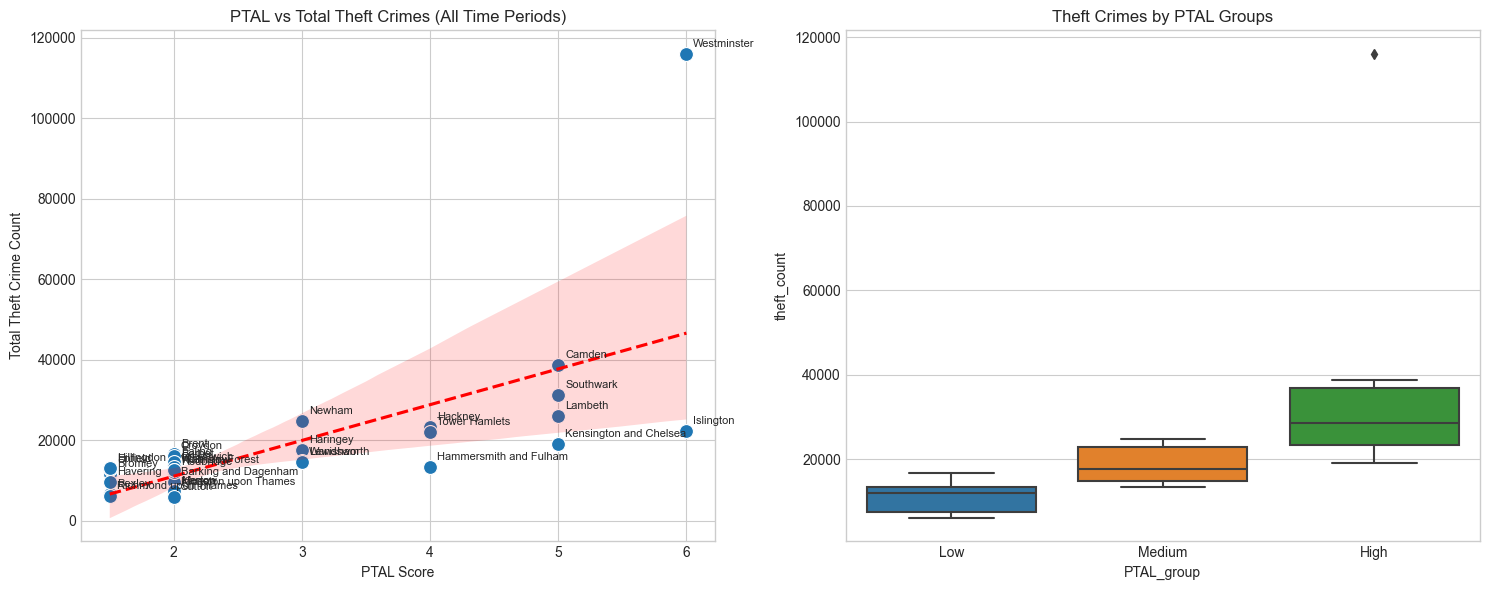


盗窃犯罪最多的5个区域：
   Borough Name  PTAL_numeric  theft_count
31  Westminster           6.0       116095
5        Camden           5.0        38814
26    Southwark           5.0        31314
20      Lambeth           5.0        26024
23       Newham           3.0        24752

THEFT与PTAL的关系：
相关系数: 0.646
P值: 0.0001
最高发区域：
   Borough Name  PTAL_numeric   count
31  Westminster           6.0  108507
5        Camden           5.0   35716
26    Southwark           5.0   27399

ROBBERY与PTAL的关系：
相关系数: 0.704
P值: 0.0000
最高发区域：
   Borough Name  PTAL_numeric  count
31  Westminster           6.0   7588
26    Southwark           5.0   3915
20      Lambeth           5.0   3737


In [34]:
# 1. 筛选盗窃相关犯罪并计算总数
theft_categories = ['THEFT', 'ROBBERY']
theft_data = crimedata[crimedata['Major Category'].isin(theft_categories)]

# 计算每个区域所有时间段的盗窃犯罪总数
crime_months = [col for col in crimedata.columns if col not in ['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category']]
theft_total = theft_data.groupby('Borough')[crime_months].sum().sum(axis=1).reset_index()
theft_total.columns = ['Borough', 'theft_count']

# 2. 合并PTAL数据
theft_analysis = theft_total.merge(
    merged_data[['Borough', 'Borough Name', 'PTAL_numeric']].drop_duplicates(),
    on='Borough',
    how='left'
)

# 3. 基本统计分析
print("盗窃犯罪基本统计：")
print(theft_analysis[['PTAL_numeric', 'theft_count']].describe())

# 4. 相关性分析
correlation, p_value = stats.pearsonr(theft_analysis['PTAL_numeric'], theft_analysis['theft_count'])
print(f"\n相关性分析：")
print(f"Pearson相关系数: {correlation:.3f}")
print(f"P值: {p_value:.4f}")

# 5. 回归分析
X = sm.add_constant(theft_analysis['PTAL_numeric'])
y = theft_analysis['theft_count']
model = sm.OLS(y, X).fit()
print("\n回归分析结果：")
print(model.summary().tables[1])

# 6. 可视化
plt.figure(figsize=(15, 6))

# 散点图和回归线
plt.subplot(1, 2, 1)
sns.scatterplot(data=theft_analysis, x='PTAL_numeric', y='theft_count', s=100)
sns.regplot(data=theft_analysis, x='PTAL_numeric', y='theft_count', 
            scatter=False, color='red', line_kws={'linestyle': '--'})

# 添加区域标签
for idx, row in theft_analysis.iterrows():
    plt.annotate(
        row['Borough Name'],
        (row['PTAL_numeric'], row['theft_count']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8
    )

plt.title('PTAL vs Total Theft Crimes (All Time Periods)', fontsize=12)
plt.xlabel('PTAL Score')
plt.ylabel('Total Theft Crime Count')

# 箱型图
plt.subplot(1, 2, 2)
theft_analysis['PTAL_group'] = pd.cut(
    theft_analysis['PTAL_numeric'], 
    bins=[0, 2, 4, 6], 
    labels=['Low', 'Medium', 'High']
)
sns.boxplot(data=theft_analysis, x='PTAL_group', y='theft_count')
plt.title('Theft Crimes by PTAL Groups')

plt.tight_layout()
plt.show()

# 7. 输出高发区域
print("\n盗窃犯罪最多的5个区域：")
print(theft_analysis.nlargest(5, 'theft_count')[['Borough Name', 'PTAL_numeric', 'theft_count']])

# 8. 分别分析THEFT和ROBBERY
for crime_type in theft_categories:
    type_data = theft_data[theft_data['Major Category'] == crime_type]
    type_total = type_data.groupby('Borough')[crime_months].sum().sum(axis=1).reset_index()
    type_total.columns = ['Borough', 'count']
    
    type_analysis = type_total.merge(
        merged_data[['Borough', 'Borough Name', 'PTAL_numeric']].drop_duplicates(),
        on='Borough',
        how='left'
    )
    
    corr, p_val = stats.pearsonr(type_analysis['PTAL_numeric'], type_analysis['count'])
    print(f"\n{crime_type}与PTAL的关系：")
    print(f"相关系数: {corr:.3f}")
    print(f"P值: {p_val:.4f}")
    print(f"最高发区域：")
    print(type_analysis.nlargest(3, 'count')[['Borough Name', 'PTAL_numeric', 'count']])

基本统计分析：
       station_count    total_crime
count      32.000000      32.000000
mean       18.750000   53622.125000
std         7.799917   26005.751051
min         7.000000   22549.000000
25%        13.750000   40698.250000
50%        16.000000   53494.500000
75%        23.750000   60609.750000
max        38.000000  171390.000000

相关性分析：
Pearson相关系数: 0.731
P值: 0.0000

回归分析结果：
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7928.6335   8416.861      0.942      0.354   -9260.891    2.51e+04
station_count  2436.9862    415.426      5.866      0.000    1588.573    3285.399


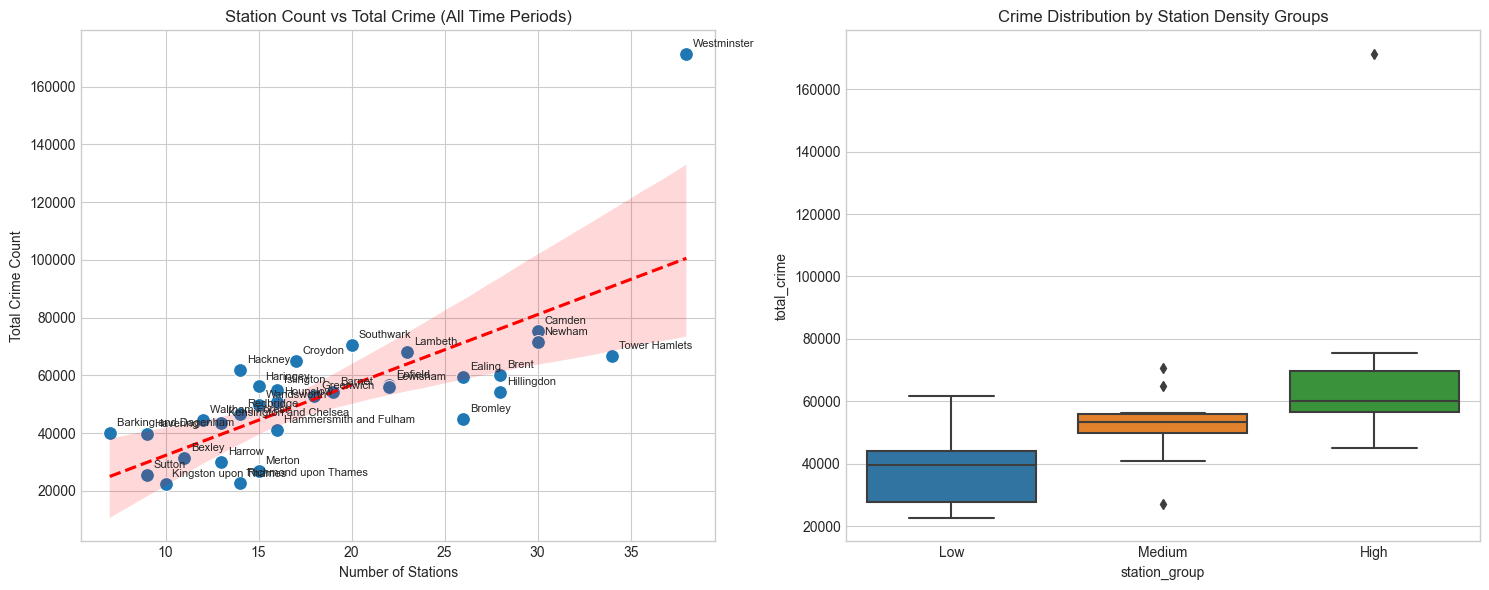


犯罪总数最多的5个区域：
   Borough Name  station_count  total_crime
31  Westminster             38       171390
5        Camden             30        75484
23       Newham             30        71485
26    Southwark             20        70588
20      Lambeth             23        68001

车站数量最多的5个区域：
     Borough Name  station_count  total_crime
31    Westminster             38       171390
28  Tower Hamlets             34        66841
5          Camden             30        75484
23         Newham             30        71485
3           Brent             28        60222

非线性回归分析结果：
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   5.45e+04   1.96e+04      2.787      0.009    1.45e+04    9.45e+04
station_count         -2635.7600   1993.983     -1.322      0.197   -6713.914    1442.394
station_count_squared   118.2625     45.631      2.592      

In [32]:
# 1. 计算每个区域的总犯罪数（所有时间段的总和）
crime_months = [col for col in crimedata.columns if col not in ['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category']]
crime_station_summary = crimedata.groupby('Borough')[crime_months].sum().sum(axis=1).reset_index()
crime_station_summary.columns = ['Borough', 'total_crime']

# 2. 合并车站数据
crime_station_summary = crime_station_summary.merge(
    merged_data[['Borough', 'Borough Name', 'station_count']].drop_duplicates(),
    on='Borough',
    how='left'
)

# 3. 基本统计分析
print("基本统计分析：")
print(crime_station_summary[['station_count', 'total_crime']].describe())

# 4. 相关性分析
correlation, p_value = stats.pearsonr(crime_station_summary['station_count'], crime_station_summary['total_crime'])
print(f"\n相关性分析：")
print(f"Pearson相关系数: {correlation:.3f}")
print(f"P值: {p_value:.4f}")

# 5. 回归分析
X = sm.add_constant(crime_station_summary['station_count'])
y = crime_station_summary['total_crime']
model = sm.OLS(y, X).fit()
print("\n回归分析结果：")
print(model.summary().tables[1])

# 6. 可视化
plt.figure(figsize=(15, 6))

# 散点图和回归线
plt.subplot(1, 2, 1)
sns.scatterplot(data=crime_station_summary, x='station_count', y='total_crime', s=100)
sns.regplot(data=crime_station_summary, x='station_count', y='total_crime', 
            scatter=False, color='red', line_kws={'linestyle': '--'})

# 添加区域标签
for idx, row in crime_station_summary.iterrows():
    plt.annotate(
        row['Borough Name'],
        (row['station_count'], row['total_crime']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8
    )

plt.title('Station Count vs Total Crime (All Time Periods)', fontsize=12)
plt.xlabel('Number of Stations')
plt.ylabel('Total Crime Count')

# 分组箱型图
plt.subplot(1, 2, 2)
crime_station_summary['station_group'] = pd.qcut(
    crime_station_summary['station_count'], 
    q=3, 
    labels=['Low', 'Medium', 'High']
)
sns.boxplot(data=crime_station_summary, x='station_group', y='total_crime')
plt.title('Crime Distribution by Station Density Groups')

plt.tight_layout()
plt.show()

# 7. 输出排名
print("\n犯罪总数最多的5个区域：")
print(crime_station_summary.nlargest(5, 'total_crime')[['Borough Name', 'station_count', 'total_crime']])

print("\n车站数量最多的5个区域：")
print(crime_station_summary.nlargest(5, 'station_count')[['Borough Name', 'station_count', 'total_crime']])

# 8. 非线性关系检验
X_squared = sm.add_constant(pd.DataFrame({
    'station_count': crime_station_summary['station_count'],
    'station_count_squared': crime_station_summary['station_count']**2
}))
model_nonlinear = sm.OLS(y, X_squared).fit()
print("\n非线性回归分析结果：")
print(model_nonlinear.summary().tables[1])

In [43]:
# 1. 准备数据
# 计算每个区域的总犯罪数
crime_total = crimedata.groupby('Borough')[time_columns].sum().sum(axis=1)

# 创建数据框
regression_data = pd.DataFrame({
    'Borough': crime_total.index,
    'total_crime': crime_total.values
})

# 合并社会经济指标
socio_economic_cols = ['disability_rate', 'population', 'poverty_rate', 'job_density']

regression_data = regression_data.merge(
    merged_data[['Borough', 'Borough Name'] + socio_economic_cols].drop_duplicates(),
    on='Borough',
    how='left'
)

# 2. 准备变量
X = regression_data[socio_economic_cols]
X = sm.add_constant(X)  # 添加常数项
y = regression_data['total_crime']

# 3. 拟合模型
model = sm.OLS(y, X).fit()

# 4. 输出结果
print("多元线性回归分析结果：")
print(model.summary())

# 5. 相关性分析
correlation_matrix = regression_data[['total_crime'] + socio_economic_cols].corr()
print("\n与犯罪率的相关性：")
print(correlation_matrix['total_crime'].sort_values(ascending=False))

# 6. 模型诊断
# 计算VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n方差膨胀因子（VIF）：")
print(vif_data)

# 7. 残差分析
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(12, 4))

# 残差图
plt.subplot(121)
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# Q-Q图
plt.subplot(122)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q plot')

plt.tight_layout()
plt.show()

# 8. 输出关键发现
print("\n关键发现：")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print("\n显著的预测变量（p < 0.05）：")
for var, coef, pval in zip(X.columns, model.params, model.pvalues):
    if pval < 0.05:
        print(f"{var}:")
        print(f"  系数: {coef:.4f}")
        print(f"  P值: {pval:.4f}")

# 9. 散点图矩阵
plt.figure(figsize=(12, 12))
pd.plotting.scatter_matrix(regression_data[['total_crime'] + socio_economic_cols], diagonal='kde')
plt.tight_layout()
plt.show()

# 10. 预测分析
predictions = model.get_prediction(X)
predictions_summary = predictions.summary_frame(alpha=0.05)

# 11. 可视化预测vs实际值
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions_summary['mean'], alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Crime Count')
plt.ylabel('Predicted Crime Count')
plt.title('Actual vs Predicted Crime Counts')
plt.tight_layout()
plt.show()

# 12. 输出每个区域的实际值vs预测值
comparison = pd.DataFrame({
    'Borough': regression_data['Borough Name'],
    'Actual': y,
    'Predicted': predictions_summary['mean'],
    'Difference': y - predictions_summary['mean']
})
print("\n预测vs实际值（按差异排序）：")
print(comparison.sort_values('Difference', ascending=False))

多元线性回归分析结果：
                            OLS Regression Results                            
Dep. Variable:            total_crime   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     90.22
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           3.22e-15
Time:                        10:23:51   Log-Likelihood:                -327.57
No. Observations:                  32   AIC:                             665.1
Df Residuals:                      27   BIC:                             672.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.375e+04   1

NameError: name 'variance_inflation_factor' is not defined

多元线性回归分析结果：
                            OLS Regression Results                            
Dep. Variable:            total_crime   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     90.22
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           3.22e-15
Time:                        10:24:28   Log-Likelihood:                -327.57
No. Observations:                  32   AIC:                             665.1
Df Residuals:                      27   BIC:                             672.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.375e+04   1

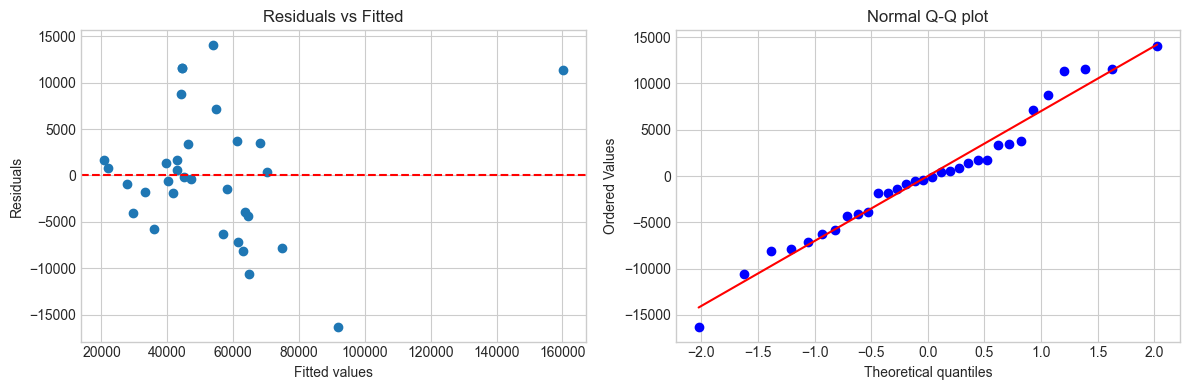


关键发现：
R-squared: 0.9304
Adjusted R-squared: 0.9201

显著的预测变量（p < 0.05）：
const:
  系数: -43751.2898
  P值: 0.0201
population:
  系数: 0.1799
  P值: 0.0000
poverty_rate:
  系数: 1727.3762
  P值: 0.0006
job_density:
  系数: 27849.4615
  P值: 0.0000


<Figure size 1200x1200 with 0 Axes>

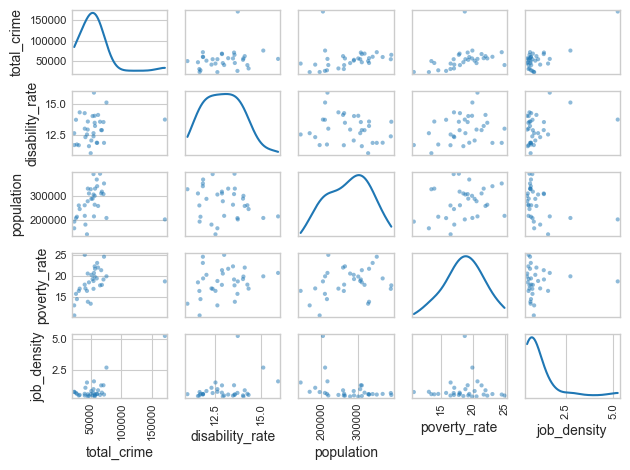

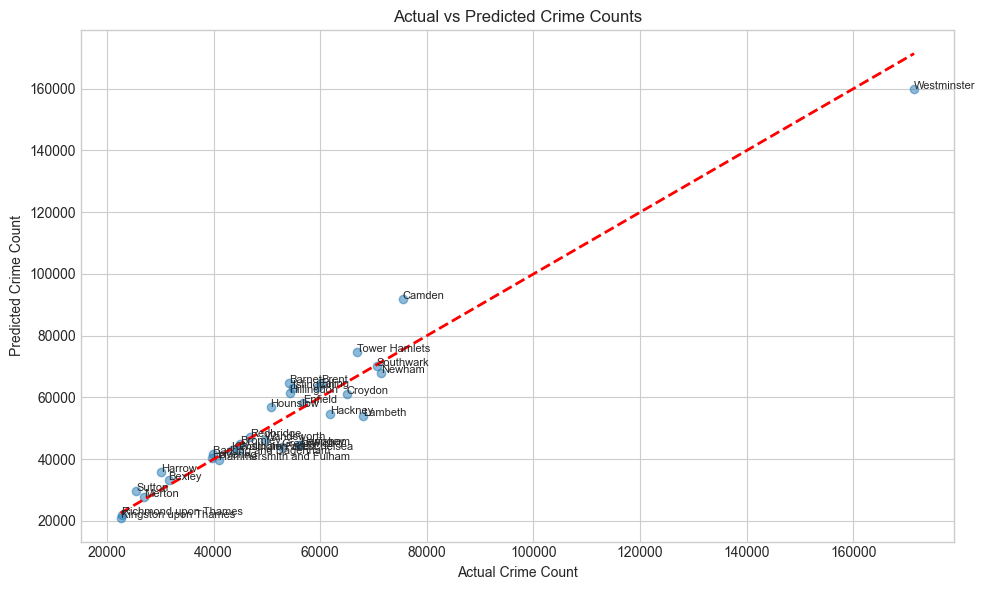


预测vs实际值（按差异百分比排序）：
                   Borough  Actual      Predicted    Difference  Difference%
20                 Lambeth   68001   53904.832497  14096.167503        20.73
21                Lewisham   56140   44588.712490  11551.287510        20.58
12                Haringey   56159   44603.202066  11555.797934        20.58
9                Greenwich   52769   44025.008212   8743.991788        16.57
10                 Hackney   61773   54641.952224   7131.047776        11.54
19    Kingston upon Thames   22549   20837.896970   1711.103030         7.59
30              Wandsworth   49633   46269.383388   3363.616612         6.78
31             Westminster  171390  160063.718177  11326.281823         6.61
6                  Croydon   65017   61262.014694   3754.985306         5.78
23                  Newham   71485   67995.220759   3489.779241         4.88
29          Waltham Forest   44714   43031.406727   1682.593273         3.76
25    Richmond upon Thames   22757   21912.186058    844

In [44]:
# 1. 导入必要的库
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. 准备数据
# 计算每个区域的总犯罪数
crime_total = crimedata.groupby('Borough')[time_columns].sum().sum(axis=1)

# 创建数据框
regression_data = pd.DataFrame({
    'Borough': crime_total.index,
    'total_crime': crime_total.values
})

# 合并社会经济指标
socio_economic_cols = ['disability_rate', 'population', 'poverty_rate', 'job_density']

regression_data = regression_data.merge(
    merged_data[['Borough', 'Borough Name'] + socio_economic_cols].drop_duplicates(),
    on='Borough',
    how='left'
)

# 3. 准备变量
X = regression_data[socio_economic_cols]
X = sm.add_constant(X)  # 添加常数项
y = regression_data['total_crime']

# 4. 拟合模型
model = sm.OLS(y, X).fit()

# 5. 输出结果
print("多元线性回归分析结果：")
print(model.summary())

# 6. 相关性分析
correlation_matrix = regression_data[['total_crime'] + socio_economic_cols].corr()
print("\n与犯罪率的相关性：")
print(correlation_matrix['total_crime'].sort_values(ascending=False))

# 7. 模型诊断 - VIF分析
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n方差膨胀因子（VIF）：")
print(vif_data)

# 8. 残差分析
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(12, 4))

# 残差图
plt.subplot(121)
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# Q-Q图
plt.subplot(122)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q plot')

plt.tight_layout()
plt.show()

# 9. 输出关键发现
print("\n关键发现：")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print("\n显著的预测变量（p < 0.05）：")
for var, coef, pval in zip(X.columns, model.params, model.pvalues):
    if pval < 0.05:
        print(f"{var}:")
        print(f"  系数: {coef:.4f}")
        print(f"  P值: {pval:.4f}")

# 10. 散点图矩阵
plt.figure(figsize=(12, 12))
pd.plotting.scatter_matrix(regression_data[['total_crime'] + socio_economic_cols], diagonal='kde')
plt.tight_layout()
plt.show()

# 11. 预测vs实际值比较
plt.figure(figsize=(10, 6))
plt.scatter(y, model.fittedvalues, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Crime Count')
plt.ylabel('Predicted Crime Count')
plt.title('Actual vs Predicted Crime Counts')

# 添加区域标签
for i, txt in enumerate(regression_data['Borough Name']):
    plt.annotate(txt, (y[i], model.fittedvalues[i]), fontsize=8)

plt.tight_layout()
plt.show()

# 12. 输出预测结果
comparison = pd.DataFrame({
    'Borough': regression_data['Borough Name'],
    'Actual': y,
    'Predicted': model.fittedvalues,
    'Difference': y - model.fittedvalues,
    'Difference%': ((y - model.fittedvalues) / y * 100).round(2)
})
print("\n预测vs实际值（按差异百分比排序）：")
print(comparison.sort_values('Difference%', ascending=False))

In [51]:
# 导入必要的库
import pysal.lib as ps
from pysal.explore import esda
from pysal.model import spreg
import geopandas as gpd
import libpysal

# 1. 准备数据
# 计算每个区域的盗窃犯罪率
theft_categories = ['THEFT', 'ROBBERY']
theft_data = crimedata[crimedata['Major Category'].isin(theft_categories)]
theft_total = theft_data.groupby('Borough')[time_columns].sum().sum(axis=1)

spatial_data = pd.DataFrame({
    'Borough': theft_total.index,
    'theft_count': theft_total.values
})

# 合并其他数据
spatial_data = spatial_data.merge(
    merged_data[['Borough', 'Borough Name', 'PTAL_numeric', 'population']].drop_duplicates(),
    on='Borough',
    how='left'
)

# 计算每千人盗窃率
spatial_data['theft_rate'] = (spatial_data['theft_count'] / spatial_data['population']) * 1000

# 2. 创建空间权重矩阵
# 需要伦敦行政区的地理数据
# 这里假设你有一个包含伦敦行政区边界的GeoJSON文件
london_gdf = gpd.read_file('path_to_london_boroughs.geojson')  # 请替换为实际文件路径

# 合并空间数据
spatial_data = london_gdf.merge(spatial_data, on='Borough')

# 创建空间权重矩阵
w = libpysal.weights.Queen.from_dataframe(spatial_data)
w.transform = 'r'  # 行标准化

# 3. 空间自相关检验
# Moran's I 检验
y = spatial_data['theft_rate']
moran = esda.Moran(y, w)
print("Moran's I 检验结果：")
print(f"Moran's I: {moran.I:.4f}")
print(f"P-value: {moran.p_sim:.4f}")

# 4. 空间滞后模型 (SLM)
X = spatial_data[['PTAL_numeric']]
X = sm.add_constant(X)

# 估计SLM
slm = spreg.ML_Lag(y, X, w, name_y='theft_rate', name_x=['constant', 'PTAL'])
print("\n空间滞后模型结果：")
print(slm.summary)

# 5. 空间误差模型 (SEM)
sem = spreg.ML_Error(y, X, w, name_y='theft_rate', name_x=['constant', 'PTAL'])
print("\n空间误差模型结果：")
print(sem.summary)

# 6. 可视化
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# 盗窃率的空间分布
spatial_data.plot(column='theft_rate', ax=axes[0,0], legend=True,
                 legend_kwds={'label': 'Theft Rate per 1000 Population'})
axes[0,0].set_title('Theft Rate Distribution')

# PTAL的空间分布
spatial_data.plot(column='PTAL_numeric', ax=axes[0,1], legend=True,
                 legend_kwds={'label': 'PTAL Score'})
axes[0,1].set_title('PTAL Distribution')

# Moran's I 散点图
moran_loc = esda.Moran_Local(y, w)
sns.regplot(x=y, y=w.sparse.todense().dot(y), ax=axes[1,0])
axes[1,0].set_title("Moran's I Scatterplot")
axes[1,0].set_xlabel('Theft Rate')
axes[1,0].set_ylabel('Spatially Lagged Theft Rate')

# 残差图
residuals = y - slm.predy
sns.scatterplot(x=slm.predy, y=residuals, ax=axes[1,1])
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_title('Residuals vs Fitted Values')
axes[1,1].set_xlabel('Fitted Values')
axes[1,1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

# 7. 局部空间自相关
lisa = esda.Moran_Local(y, w)
sig = lisa.p_sim < 0.05
hotspots = lisa.q == 1
coldspots = lisa.q == 3

print("\n局部空间自相关分析：")
print("显著热点区域（高-高聚类）：")
print(spatial_data[sig & hotspots]['Borough Name'].tolist())
print("\n显著冷点区域（低-低聚类）：")
print(spatial_data[sig & coldspots]['Borough Name'].tolist())

# 8. 模型比较
print("\n模型比较：")
print(f"SLM AIC: {slm.aic:.4f}")
print(f"SEM AIC: {sem.aic:.4f}")
print(f"SLM R2: {slm.pr2:.4f}")
print(f"SEM R2: {sem.pr2:.4f}")

# 9. 直接效应和间接效应（仅适用于SLM）
impacts = spreg.ML_Lag_Regimes.impacts(slm, w)
print("\n空间效应：")
print("直接效应：", impacts[0])
print("间接效应：", impacts[1])
print("总效应：", impacts[2])

ImportError: Numba needs NumPy 1.24 or less